# Tutorial on how to open, visualize and extract some features from a .mhd Image

This Tutorial will show how to:
    - Open and read a .mhd image
    - Visualize a .mhd image
    - Read a list of candidates from a .csv file
    - Transform from world coordinates to voxel coordinates
    - Extract some features / patches of candidates and visualize them
To be able to run this tutorial some python libraries / modules need to be installed:
    - Simple ITK: a library for handling and processing medical images
    - Numpy: a fundamental package for scientific computing with Python
    - PIL (Python Imaging Library): a library for adding image processing capabilities to your Python interpreter 
    - Matplotlib: a plotting library for the Python programming language

We start importing required modules / libraries  using the import command from python

In [1]:
import SimpleITK as sitk
import numpy as np
import csv
import os
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

We define now a function to:
    - Open the image 
    - Store it into a numpy array
    - Extract the following info: Pixel Spacing, Origin
This function takes as input the name of the image and returns:
    - The array corresponding to the image (numpyImage)
    - Origin (numpyOrigin)
    - PixelSpacing (numpySpacing)

In [2]:
def load_itk_image(filename):
    itkimage = sitk.ReadImage(filename)
    numpyImage = sitk.GetArrayFromImage(itkimage)
     
    numpyOrigin = np.array(list(reversed(itkimage.GetOrigin())))
    numpySpacing = np.array(list(reversed(itkimage.GetSpacing())))
     
    return numpyImage, numpyOrigin, numpySpacing

To be able to open and read the list of candidates, we need to use the csv python module. 
We define now a function to:
    - Open a csv file
    - Read a csv file
    - Save each line of a csv file
This functions takes as input the name of the csv file and returns:
    - A list of each line of the csv

In [3]:
def readCSV(filename):
    lines = []
    with open(filename, "rb") as f:
        csvreader = csv.reader(f)
        for line in csvreader:
            lines.append(line)
    return lines

Since the coordinates of the candidates are given in World Coordinates, we now need to transform from world coordinates to voxel coordinates. 
We define now a function to do that. Please note that the transformation below is only valid if there is no rotation component in the transformation matrix. For all CT images in our dataset, there is no rotation component so that this formula can be used. 
This function takes as inputs:
    - The world coordinates
    - The origin
    - The pixel Spacing
This function returns:
    - Voxel coordinates (voxelCoord)

In [4]:
def worldToVoxelCoord(worldCoord, origin, spacing):
     
    stretchedVoxelCoord = np.absolute(worldCoord - origin)
    voxelCoord = stretchedVoxelCoord / spacing
    return voxelCoord

We want to extract now some features from the candidates. We define some normalized planes to extract views from the candidates

In [5]:
def normalizePlanes(npzarray):
     
    maxHU = 400.
    minHU = -1000.
 
    npzarray = (npzarray - minHU) / (maxHU - minHU)
    npzarray[npzarray>1] = 1.
    npzarray[npzarray<0] = 0.
    return npzarray

After having defined these auxiliary functions, we can now define the main part of our script.
First we:
    - Specify the path where the image (img_path) is 
    - Specificy the path where the file with the list of candidates is (cand_path)

In [14]:
img_path  = 'Luna16 data/seg-lungs-LUNA16/seg-lungs-LUNA16/1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222365663678666836860.mhd'
cand_path = 'Luna16 data/seg-lungs-LUNA16/seg-lungs-LUNA16/CSVFILES/candidates.csv'

Using the function defined in line 2 we can:
    - Load the image
    - Extract the Origin
    - Extract the Pixel Spacing 

In [15]:
# load image
numpyImage, numpyOrigin, numpySpacing = load_itk_image(img_path)
print numpyImage.shape
print numpyOrigin
print numpySpacing

(194L, 512L, 512L)
[-438.4     -311.67773 -157.67773]
[ 1.79999995  0.64453125  0.64453125]


Using the function defined in line 3 we can:
    - Load the csv file
    - Get the candidates 
Using the function defined in line 4 we can: 
    - Transform from world to voxel coordinates

In [16]:
# load candidates
cands = readCSV(cand_path)
#print cands
# get candidates
for cand in cands[1:]:
    worldCoord = np.asarray([float(cand[3]),float(cand[2]),float(cand[1])])
    voxelCoord = worldToVoxelCoord(worldCoord, numpyOrigin, numpySpacing)
    voxelWidth = 65

Using the function defined in line 5 we can:
    - Extract patch for each candidate in the list
    - Visualize each patch
    - Save each page as image in .tiff format

data
[-311.92  -67.85  -56.08]
[  70.26666853  378.30241745  157.63041745]
[[ 0.71714286  0.71714286  0.71714286 ...,  0.71714286  0.71714286
   0.71714286]
 [ 0.71714286  0.71714286  0.71714286 ...,  0.71714286  0.71714286
   0.71714286]
 [ 0.71714286  0.71714286  0.71714286 ...,  0.71714286  0.71714286
   0.71714286]
 ..., 
 [ 0.71428571  0.71428571  0.71428571 ...,  0.71428571  0.71428571
   0.71428571]
 [ 0.71428571  0.71428571  0.71428571 ...,  0.71428571  0.71428571
   0.71428571]
 [ 0.71428571  0.71428571  0.71428571 ...,  0.71428571  0.71428571
   0.71428571]]


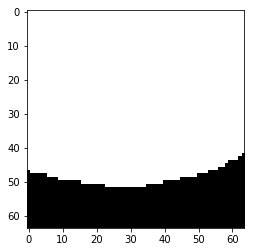

data
[-245.17 -244.41   53.21]
[ 107.35000284  104.3669023   327.19550836]
[[ 0.71428571  0.71428571  0.71428571 ...,  0.71428571  0.71428571
   0.71428571]
 [ 0.71428571  0.71428571  0.71428571 ...,  0.71428571  0.71428571
   0.71428571]
 [ 0.71428571  0.71428571  0.71428571 ...,  0.71428571  0.71428571
   0.71428571]
 ..., 
 [ 0.71428571  0.71428571  0.71428571 ...,  0.71642857  0.71642857
   0.71642857]
 [ 0.71428571  0.71428571  0.71428571 ...,  0.71642857  0.71642857
   0.71642857]
 [ 0.71428571  0.71428571  0.71428571 ...,  0.71642857  0.71642857
   0.71642857]]


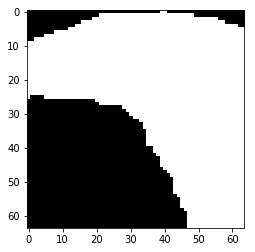

data
[-286.62 -121.8   103.66]
[  84.32222446  294.59817503  405.46944776]
[[ 0.71642857  0.71642857  0.71642857 ...,  0.71642857  0.71642857
   0.71642857]
 [ 0.71642857  0.71642857  0.71642857 ...,  0.71642857  0.71642857
   0.71642857]
 [ 0.71642857  0.71642857  0.71642857 ...,  0.71642857  0.71642857
   0.71642857]
 ..., 
 [ 0.71642857  0.71642857  0.71642857 ...,  0.71642857  0.71642857
   0.71642857]
 [ 0.71642857  0.71642857  0.71642857 ...,  0.71642857  0.71642857
   0.71642857]
 [ 0.71642857  0.71642857  0.71642857 ...,  0.71642857  0.71642857
   0.71642857]]


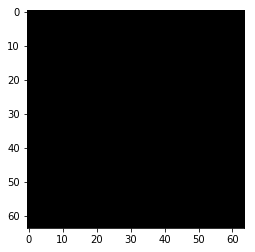

data
[-308.41  -72.75  -33.66]
[  72.21666858  370.69999321  192.41538715]
[[ 0.71714286  0.71714286  0.71714286 ...,  0.71714286  0.71714286
   0.71714286]
 [ 0.71714286  0.71714286  0.71714286 ...,  0.71714286  0.71714286
   0.71714286]
 [ 0.71714286  0.71714286  0.71714286 ...,  0.71714286  0.71714286
   0.71714286]
 ..., 
 [ 0.71428571  0.71428571  0.71428571 ...,  0.71428571  0.71428571
   0.71428571]
 [ 0.71428571  0.71428571  0.71428571 ...,  0.71428571  0.71428571
   0.71428571]
 [ 0.71428571  0.71428571  0.71428571 ...,  0.71428571  0.71428571
   0.71428571]]


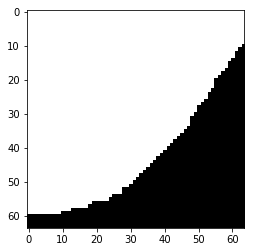

data
[-362.51  -85.36  -32.25]
[  42.16111223  351.13538715  194.60302352]
[[ 0.71428571  0.71428571  0.71428571 ...,  0.71428571  0.71428571
   0.71428571]
 [ 0.71428571  0.71428571  0.71428571 ...,  0.71428571  0.71428571
   0.71428571]
 [ 0.71428571  0.71428571  0.71428571 ...,  0.71428571  0.71428571
   0.71428571]
 ..., 
 [ 0.71714286  0.71714286  0.71714286 ...,  0.71428571  0.71428571
   0.71428571]
 [ 0.71714286  0.71714286  0.71714286 ...,  0.71428571  0.71428571
   0.71428571]
 [ 0.71428571  0.71428571  0.71428571 ...,  0.71428571  0.71428571
   0.71428571]]


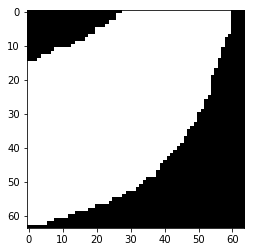

data
[-165.07 -203.07  -26.65]
[ 151.85000402  168.50653867  203.29150836]
[[ 0.71428571  0.71428571  0.71428571 ...,  0.71428571  0.71428571
   0.71428571]
 [ 0.71428571  0.71428571  0.71428571 ...,  0.71428571  0.71428571
   0.71428571]
 [ 0.71428571  0.71428571  0.71428571 ...,  0.71714286  0.71714286
   0.71714286]
 ..., 
 [ 0.71714286  0.71714286  0.71714286 ...,  0.71428571  0.71428571
   0.71428571]
 [ 0.71714286  0.71714286  0.71714286 ...,  0.71428571  0.71428571
   0.71428571]
 [ 0.71714286  0.71714286  0.71714286 ...,  0.71428571  0.71428571
   0.71428571]]


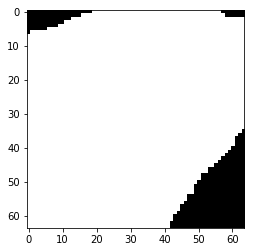

data
[-311.92 -114.79  -74.99]
[  70.26666853  305.47429624  128.29126594]
[[ 0.71714286  0.71714286  0.71714286 ...,  0.71714286  0.71714286
   0.71714286]
 [ 0.71714286  0.71714286  0.71714286 ...,  0.71714286  0.71714286
   0.71714286]
 [ 0.71714286  0.71714286  0.71714286 ...,  0.71714286  0.71714286
   0.71714286]
 ..., 
 [ 0.71714286  0.71714286  0.71714286 ...,  0.71714286  0.71714286
   0.71714286]
 [ 0.71714286  0.71714286  0.71714286 ...,  0.71714286  0.71714286
   0.71714286]
 [ 0.71714286  0.71714286  0.71714286 ...,  0.71714286  0.71714286
   0.71714286]]


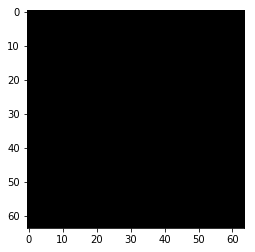

data
[-239.55 -248.61  -16.14]
[ 110.47222515   97.85053867  219.59793261]
[[ 0.71428571  0.71428571  0.71428571 ...,  0.71428571  0.71428571
   0.71428571]
 [ 0.71428571  0.71428571  0.71428571 ...,  0.71428571  0.71428571
   0.71428571]
 [ 0.71428571  0.71428571  0.71428571 ...,  0.71428571  0.71428571
   0.71428571]
 ..., 
 [ 0.71714286  0.71714286  0.71714286 ...,  0.71428571  0.71428571
   0.71428571]
 [ 0.71714286  0.71714286  0.71714286 ...,  0.71428571  0.71428571
   0.71428571]
 [ 0.71714286  0.71714286  0.71714286 ...,  0.71428571  0.71428571
   0.71428571]]


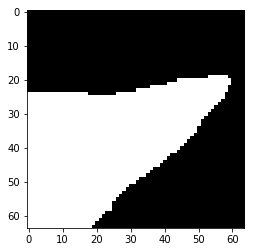

data
[-252.2  -141.41  135.89]
[ 103.44444718  264.17296291  455.47478109]
[[ 0.71642857  0.71642857  0.71642857 ...,  0.71428571  0.71428571
   0.71428571]
 [ 0.71642857  0.71642857  0.71642857 ...,  0.71428571  0.71428571
   0.71428571]
 [ 0.71642857  0.71642857  0.71642857 ...,  0.71428571  0.71428571
   0.71428571]
 ..., 
 [ 0.71642857  0.71642857  0.71642857 ...,  0.71428571  0.71428571
   0.71428571]
 [ 0.71642857  0.71642857  0.71642857 ...,  0.71428571  0.71428571
   0.71428571]
 [ 0.71642857  0.71642857  0.71642857 ...,  0.71428571  0.71428571
   0.71428571]]


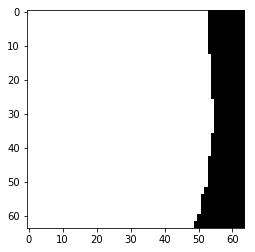

data
[-218.24339644  -68.43084739   90.10228469]
[ 122.30922744  377.40122393  384.43444704]
[[ 0.71642857  0.71642857  0.71642857 ...,  0.71642857  0.71642857
   0.71642857]
 [ 0.71642857  0.71642857  0.71642857 ...,  0.71642857  0.71642857
   0.71642857]
 [ 0.71642857  0.71642857  0.71642857 ...,  0.71642857  0.71642857
   0.71642857]
 ..., 
 [ 0.71428571  0.71428571  0.71428571 ...,  0.71428571  0.71428571
   0.71428571]
 [ 0.71428571  0.71428571  0.71428571 ...,  0.71428571  0.71428571
   0.71428571]
 [ 0.71428571  0.71428571  0.71428571 ...,  0.71428571  0.71428571
   0.71428571]]


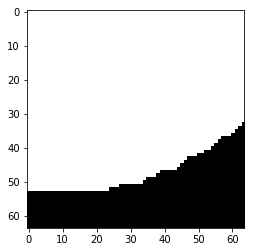

data
[-252.9463643 -164.1271858  -45.8738148]
[ 103.02980034  228.92690494  173.46546843]
[[ 0.71714286  0.71714286  0.71714286 ...,  0.71428571  0.71428571
   0.71428571]
 [ 0.71714286  0.71714286  0.71714286 ...,  0.71428571  0.71428571
   0.71428571]
 [ 0.71714286  0.71714286  0.71714286 ...,  0.71428571  0.71428571
   0.71428571]
 ..., 
 [ 0.71714286  0.71714286  0.71714286 ...,  0.71714286  0.71714286
   0.71714286]
 [ 0.71714286  0.71714286  0.71714286 ...,  0.71714286  0.71714286
   0.71714286]
 [ 0.71714286  0.71714286  0.71714286 ...,  0.71714286  0.71714286
   0.71714286]]


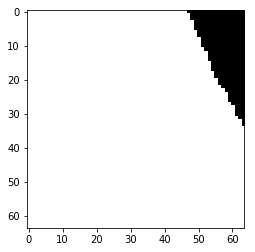

data
[-280.6334251  -126.4715463   -49.25024535]
[  87.64809949  287.35020016  168.22688528]
[[ 0.71714286  0.71714286  0.71714286 ...,  0.71714286  0.71714286
   0.71714286]
 [ 0.71714286  0.71714286  0.71714286 ...,  0.71714286  0.71714286
   0.71714286]
 [ 0.71714286  0.71714286  0.71714286 ...,  0.71714286  0.71714286
   0.71714286]
 ..., 
 [ 0.71714286  0.71714286  0.71714286 ...,  0.71714286  0.71714286
   0.71714286]
 [ 0.71714286  0.71714286  0.71714286 ...,  0.71714286  0.71714286
   0.71714286]
 [ 0.71714286  0.71714286  0.71714286 ...,  0.71714286  0.71714286
   0.71714286]]


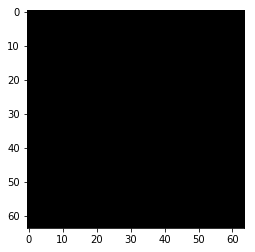

data
[-276.7839906  -132.6987362   -27.73150054]
[  89.78667427  277.68862068  201.61354389]
[[ 0.71714286  0.71714286  0.71714286 ...,  0.71714286  0.71428571
   0.71428571]
 [ 0.71714286  0.71714286  0.71714286 ...,  0.71714286  0.71428571
   0.71428571]
 [ 0.71714286  0.71714286  0.71714286 ...,  0.71714286  0.71714286
   0.71428571]
 ..., 
 [ 0.71714286  0.71714286  0.71714286 ...,  0.71714286  0.71714286
   0.71714286]
 [ 0.71714286  0.71714286  0.71714286 ...,  0.71714286  0.71714286
   0.71714286]
 [ 0.71714286  0.71714286  0.71714286 ...,  0.71714286  0.71714286
   0.71714286]]


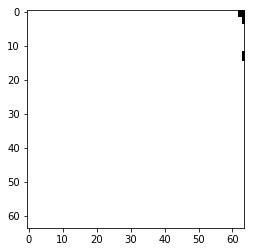

data
[-227.01136375 -211.68559102  104.16480444]
[ 117.43813436  155.13931866  406.25265949]
[[ 0.71642857  0.71642857  0.71642857 ...,  0.71428571  0.71428571
   0.71428571]
 [ 0.71642857  0.71642857  0.71642857 ...,  0.71428571  0.71428571
   0.71428571]
 [ 0.71642857  0.71642857  0.71642857 ...,  0.71428571  0.71428571
   0.71428571]
 ..., 
 [ 0.71642857  0.71642857  0.71642857 ...,  0.71642857  0.71642857
   0.71642857]
 [ 0.71642857  0.71642857  0.71642857 ...,  0.71642857  0.71642857
   0.71642857]
 [ 0.71642857  0.71642857  0.71642857 ...,  0.71642857  0.71642857
   0.71642857]]


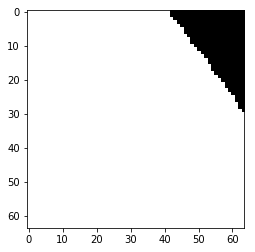

data
[-199.99235316 -104.18182376  -28.8342414 ]
[ 132.4486962   321.93304241  199.90262473]
[[ 0.71714286  0.71714286  0.71714286 ...,  0.71714286  0.71714286
   0.71714286]
 [ 0.71714286  0.71714286  0.71714286 ...,  0.71714286  0.71714286
   0.71714286]
 [ 0.71714286  0.71714286  0.71714286 ...,  0.71714286  0.71714286
   0.71714286]
 ..., 
 [ 0.71714286  0.71714286  0.71714286 ...,  0.71714286  0.71714286
   0.71714286]
 [ 0.71714286  0.71714286  0.71714286 ...,  0.71714286  0.71714286
   0.71714286]
 [ 0.71714286  0.71714286  0.71714286 ...,  0.71714286  0.71714286
   0.71714286]]


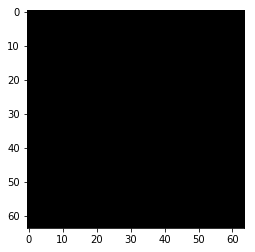

data
[-275.58671607 -126.901967     81.16818323]
[  90.4518268   286.68239593  370.57305325]
[[ 0.71642857  0.71642857  0.71642857 ...,  0.71642857  0.71642857
   0.71642857]
 [ 0.71642857  0.71642857  0.71642857 ...,  0.71642857  0.71642857
   0.71642857]
 [ 0.71642857  0.71642857  0.71642857 ...,  0.71642857  0.71642857
   0.71642857]
 ..., 
 [ 0.71642857  0.71642857  0.71642857 ...,  0.71642857  0.71642857
   0.71642857]
 [ 0.71642857  0.71642857  0.71642857 ...,  0.71642857  0.71642857
   0.71642857]
 [ 0.71642857  0.71642857  0.71642857 ...,  0.71642857  0.71642857
   0.71642857]]


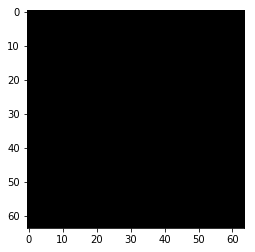

data
[-265.79473706 -163.71378969  -54.81735285]
[  95.89181529  229.56829527  159.58943365]
[[ 0.71714286  0.71714286  0.71714286 ...,  0.71714286  0.71714286
   0.71428571]
 [ 0.71714286  0.71714286  0.71714286 ...,  0.71714286  0.71714286
   0.71714286]
 [ 0.71714286  0.71714286  0.71714286 ...,  0.71714286  0.71714286
   0.71714286]
 ..., 
 [ 0.71714286  0.71714286  0.71714286 ...,  0.71714286  0.71714286
   0.71714286]
 [ 0.71714286  0.71714286  0.71714286 ...,  0.71714286  0.71714286
   0.71714286]
 [ 0.71714286  0.71714286  0.71714286 ...,  0.71714286  0.71714286
   0.71714286]]


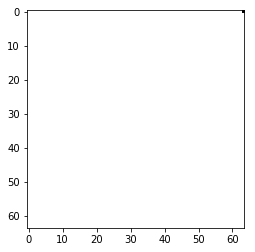

data
[-207.07205504 -144.11532892  -37.30006736]
[ 128.51552838  259.9756041   186.76776749]
[[ 0.71714286  0.71714286  0.71714286 ...,  0.71428571  0.71428571
   0.71428571]
 [ 0.71714286  0.71714286  0.71714286 ...,  0.71428571  0.71428571
   0.71428571]
 [ 0.71714286  0.71714286  0.71714286 ...,  0.71428571  0.71428571
   0.71428571]
 ..., 
 [ 0.71714286  0.71714286  0.71714286 ...,  0.71714286  0.71714286
   0.71714286]
 [ 0.71714286  0.71714286  0.71714286 ...,  0.71714286  0.71714286
   0.71714286]
 [ 0.71714286  0.71714286  0.71714286 ...,  0.71714286  0.71714286
   0.71714286]]


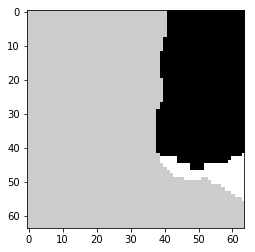

data
[-315.80175461  -84.52505459  -94.69556162]
[  68.11013813  352.43081761   97.71778852]
[[ 0.71714286  0.71714286  0.71714286 ...,  0.71714286  0.71714286
   0.71714286]
 [ 0.71714286  0.71714286  0.71714286 ...,  0.71714286  0.71714286
   0.71714286]
 [ 0.71714286  0.71714286  0.71714286 ...,  0.71714286  0.71714286
   0.71714286]
 ..., 
 [ 0.71428571  0.71428571  0.71428571 ...,  0.71714286  0.71714286
   0.71714286]
 [ 0.71428571  0.71428571  0.71428571 ...,  0.71714286  0.71714286
   0.71714286]
 [ 0.71428571  0.71428571  0.71428571 ...,  0.71714286  0.71714286
   0.71714286]]


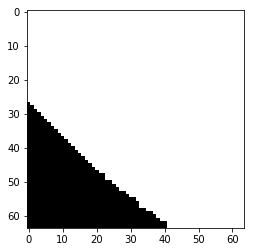

data
[-347.97083344  -96.11941678 -115.02966677]
[  50.2384272   334.441989     66.16911628]
[[ 0.71714286  0.71714286  0.71714286 ...,  0.71428571  0.71428571
   0.71428571]
 [ 0.71714286  0.71714286  0.71714286 ...,  0.71428571  0.71428571
   0.71428571]
 [ 0.71714286  0.71714286  0.71714286 ...,  0.71428571  0.71428571
   0.71428571]
 ..., 
 [ 0.71428571  0.71428571  0.71428571 ...,  0.71714286  0.71714286
   0.71714286]
 [ 0.71428571  0.71428571  0.71428571 ...,  0.71714286  0.71714286
   0.71714286]
 [ 0.71428571  0.71428571  0.71428571 ...,  0.71714286  0.71714286
   0.71714286]]


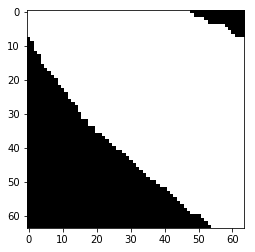

data
[-263.2874317  -108.0492248    54.76564694]
[  97.28476274  315.9327111   329.60911816]
[[ 0.71428571  0.71642857  0.71642857 ...,  0.71642857  0.71642857
   0.71642857]
 [ 0.71428571  0.71642857  0.71642857 ...,  0.71642857  0.71642857
   0.71642857]
 [ 0.71428571  0.71642857  0.71642857 ...,  0.71642857  0.71642857
   0.71642857]
 ..., 
 [ 0.71428571  0.71428571  0.71428571 ...,  0.71642857  0.71642857
   0.71642857]
 [ 0.71428571  0.71428571  0.71428571 ...,  0.71642857  0.71642857
   0.71642857]
 [ 0.71428571  0.71428571  0.71428571 ...,  0.71642857  0.71642857
   0.71642857]]


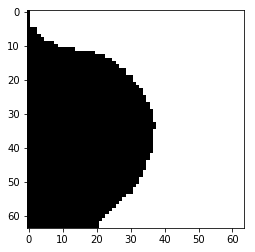

data
[-341.65280396  -75.27143105   77.90486802]
[  53.74844367  366.78795474  365.50997025]
[[ 0.71642857  0.71642857  0.71642857 ...,  0.71642857  0.71642857
   0.71642857]
 [ 0.71642857  0.71642857  0.71642857 ...,  0.71642857  0.71642857
   0.71642857]
 [ 0.71642857  0.71642857  0.71642857 ...,  0.71642857  0.71642857
   0.71642857]
 ..., 
 [ 0.71428571  0.71428571  0.71428571 ...,  0.71428571  0.71428571
   0.71428571]
 [ 0.71428571  0.71428571  0.71428571 ...,  0.71428571  0.71428571
   0.71428571]
 [ 0.71428571  0.71428571  0.71428571 ...,  0.71428571  0.71428571
   0.71428571]]


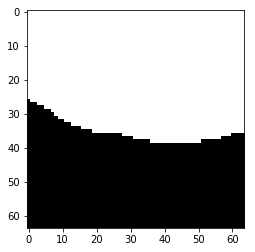

data
[-249.39 -153.32  -56.78]
[ 105.00555834  245.69441745  156.54435685]
[[ 0.71714286  0.71714286  0.71714286 ...,  0.71714286  0.71714286
   0.71714286]
 [ 0.71714286  0.71714286  0.71714286 ...,  0.71714286  0.71714286
   0.71714286]
 [ 0.71714286  0.71714286  0.71714286 ...,  0.71714286  0.71714286
   0.71714286]
 ..., 
 [ 0.71714286  0.71714286  0.71714286 ...,  0.71714286  0.71714286
   0.71714286]
 [ 0.71714286  0.71714286  0.71714286 ...,  0.71714286  0.71714286
   0.71714286]
 [ 0.71714286  0.71714286  0.71714286 ...,  0.71714286  0.71714286
   0.71714286]]


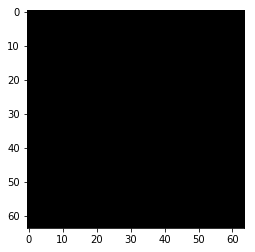

data
[-262.74 -149.12   54.62]
[  97.58889147  252.21078109  329.38314473]
[[ 0.71428571  0.71428571  0.71428571 ...,  0.71642857  0.71642857
   0.71642857]
 [ 0.71428571  0.71428571  0.71428571 ...,  0.71642857  0.71642857
   0.71642857]
 [ 0.71428571  0.71428571  0.71428571 ...,  0.71642857  0.71642857
   0.71642857]
 ..., 
 [ 0.71428571  0.71642857  0.71642857 ...,  0.71642857  0.71642857
   0.71642857]
 [ 0.71428571  0.71642857  0.71642857 ...,  0.71642857  0.71642857
   0.71642857]
 [ 0.71428571  0.71642857  0.71642857 ...,  0.71642857  0.71642857
   0.71642857]]


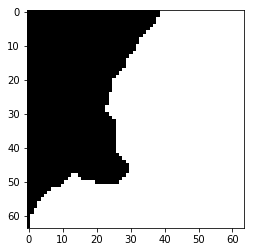

data
[-324.57  -98.67  -83.4 ]
[  63.23889056  330.48472048  115.24302352]
[[ 0.71714286  0.71714286  0.71714286 ...,  0.71714286  0.71714286
   0.71714286]
 [ 0.71714286  0.71714286  0.71714286 ...,  0.71714286  0.71714286
   0.71714286]
 [ 0.71714286  0.71714286  0.71714286 ...,  0.71714286  0.71714286
   0.71714286]
 ..., 
 [ 0.71714286  0.71714286  0.71714286 ...,  0.71714286  0.71714286
   0.71714286]
 [ 0.71714286  0.71714286  0.71714286 ...,  0.71714286  0.71714286
   0.71714286]
 [ 0.71714286  0.71714286  0.71714286 ...,  0.71714286  0.71714286
   0.71714286]]


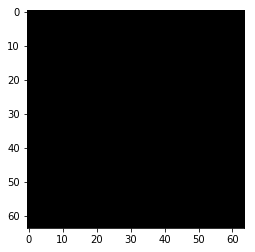

data
[-169.29 -126.     68.63]
[ 149.50555952  288.08181139  351.119872  ]
[[ 0.71642857  0.71642857  0.71642857 ...,  0.71642857  0.71642857
   0.71642857]
 [ 0.71642857  0.71642857  0.71642857 ...,  0.71642857  0.71642857
   0.71642857]
 [ 0.71642857  0.71642857  0.71642857 ...,  0.71642857  0.71642857
   0.71642857]
 ..., 
 [ 0.71642857  0.71642857  0.71642857 ...,  0.71642857  0.71642857
   0.71642857]
 [ 0.71642857  0.71642857  0.71642857 ...,  0.71642857  0.71642857
   0.71642857]
 [ 0.71642857  0.71642857  0.71642857 ...,  0.71642857  0.71642857
   0.71642857]]


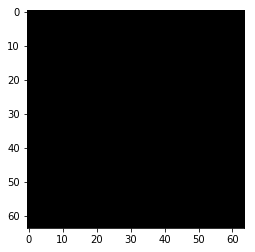

data
[-270.46 -187.66   81.24]
[  93.30000247  192.41538715  370.68447806]
[[ 0.71428571  0.71428571  0.71428571 ...,  0.71642857  0.71642857
   0.71642857]
 [ 0.71428571  0.71428571  0.71428571 ...,  0.71642857  0.71642857
   0.71642857]
 [ 0.71428571  0.71428571  0.71428571 ...,  0.71642857  0.71642857
   0.71642857]
 ..., 
 [ 0.71642857  0.71642857  0.71642857 ...,  0.71642857  0.71642857
   0.71642857]
 [ 0.71642857  0.71642857  0.71642857 ...,  0.71642857  0.71642857
   0.71642857]
 [ 0.71642857  0.71642857  0.71642857 ...,  0.71642857  0.71642857
   0.71642857]]


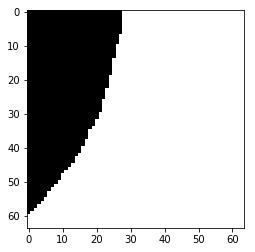

data
[-279.6  -229.69  -35.06]
[  88.22222456  127.20520533  190.24326594]
[[ 0.71714286  0.71714286  0.71714286 ...,  0.71714286  0.71714286
   0.71714286]
 [ 0.71714286  0.71714286  0.71714286 ...,  0.71714286  0.71714286
   0.71714286]
 [ 0.71714286  0.71714286  0.71714286 ...,  0.71714286  0.71714286
   0.71714286]
 ..., 
 [ 0.71714286  0.71714286  0.71714286 ...,  0.71428571  0.71428571
   0.71428571]
 [ 0.71714286  0.71714286  0.71714286 ...,  0.71428571  0.71428571
   0.71428571]
 [ 0.71714286  0.71714286  0.71714286 ...,  0.71428571  0.71428571
   0.71428571]]


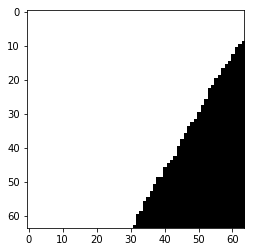

data
[-394.83  -83.96  -84.8 ]
[  24.2055562   353.30750836  113.0709023 ]
[[ 0.71428571  0.71428571  0.71428571 ...,  0.71428571  0.71428571
   0.71428571]
 [ 0.71428571  0.71428571  0.71428571 ...,  0.71428571  0.71428571
   0.71428571]
 [ 0.71428571  0.71428571  0.71428571 ...,  0.71428571  0.71428571
   0.71428571]
 ..., 
 [ 0.71428571  0.71428571  0.71428571 ...,  0.71428571  0.71428571
   0.71428571]
 [ 0.71428571  0.71428571  0.71428571 ...,  0.71428571  0.71428571
   0.71428571]
 [ 0.71428571  0.71428571  0.71428571 ...,  0.71428571  0.71428571
   0.71428571]]


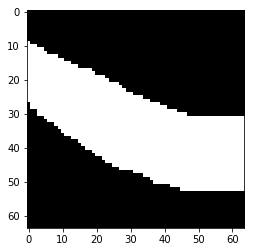

data
[-335.81 -150.52 -138.05]
[  56.99444595  250.03865988   30.45272048]
[]


C:\Users\csio\Anaconda2\lib\site-packages\matplotlib\axes\_base.py:2917: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=-0.5, right=-0.5
  'left=%s, right=%s') % (left, right))


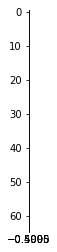

ValueError: tile cannot extend outside image

In [18]:
for cand in cands[1:]:
    worldCoord = np.asarray([float(cand[3]),float(cand[2]),float(cand[1])])
    voxelCoord = worldToVoxelCoord(worldCoord, numpyOrigin, numpySpacing)
    voxelWidth = 65
    patch = numpyImage[voxelCoord[0],int(voxelCoord[1]-voxelWidth/2):int(voxelCoord[1]+voxelWidth/2),int(voxelCoord[2]-voxelWidth/2):int(voxelCoord[2]+voxelWidth/2) ]
    patch = normalizePlanes(patch)
    print 'data'
    print worldCoord
    print voxelCoord
    print patch
    outputDir = 'patches/'
    plt.imshow(patch, cmap='gray')
    plt.show()
    Image.fromarray(patch*255).convert('L').save(os.path.join(outputDir, 'patch_' + str(worldCoord[0]) + '_' + str(worldCoord[1]) + '_' + str(worldCoord[2]) + '.tiff'))
 